<a href="https://colab.research.google.com/github/ranaehelal/Movie-Review-Sentiment/blob/main/IMDB_Dataset_of_50K_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

100%|██████████| 25.7M/25.7M [00:02<00:00, 10.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
import pandas as pd
import numpy as np

file_path = "/root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1/IMDB Dataset.csv"

df = pd.read_csv(file_path)

print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [8]:
df.shape

(50000, 2)

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [11]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


<ipython-input-12-29f4562d3d50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="coolwarm")


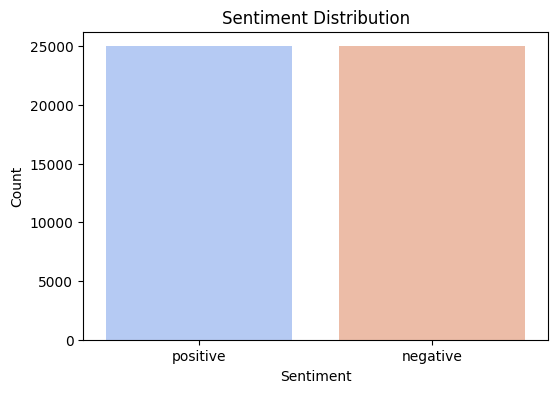

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['sentiment'], palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


## Classification
### Negative = 0
### Positive = 1

In [13]:
df.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)

<ipython-input-13-00b3046a1d3c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sentiment':{'positive':1,'negative':0}},inplace=True)


In [14]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [15]:
df['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


# preprocessing text data

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer #word to its base by better way than stemming

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english')) # words like 'the', 'is', 'in .


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I)
    text = text.lower()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

    return text


In [18]:
df['review'] = df['review'].apply(clean_text)


In [19]:
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode you...,1
1,wonderful little production br /><br />the fil...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there family little boy jake) think ...,0
4,"petter matteis love time money"" visually stunn...",1


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [21]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>") # most common
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])#to numbers
padded_sequences = pad_sequences(sequences, maxlen=200, padding='post') #if less add 0 more trunc


In [22]:
labels = df['sentiment'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [24]:
X_train

array([[   1, 1150,  181, ...,  119,  134, 3777],
       [  35,  363,    3, ...,    0,    0,    0],
       [1292,   37,   12, ...,    0,    0,    0],
       ...,
       [ 710,    5,  306, ...,    0,    0,    0],
       [ 259,   92,  644, ...,    0,    0,    0],
       [ 467,    3,  177, ...,    0,    0,    0]], dtype=int32)

In [25]:
X_test

array([[ 18, 347,   1, ...,   0,   0,   0],
       [139, 137,   6, ...,   2,   1,   1],
       [  4, 850,  13, ...,   0,   0,   0],
       ...,
       [341,   1, 113, ...,   0,   0,   0],
       [133,   4,  34, ...,   0,   0,   0],
       [122,   1,  56, ...,   0,   0,   0]], dtype=int32)

In [26]:
X_train.shape

(40000, 200)

In [27]:
X_test.shape

(10000, 200)

In [28]:
y_test

array([1, 1, 0, ..., 1, 0, 1])

In [29]:
y_train

array([0, 0, 1, ..., 0, 1, 1])

## LSTM
### build the model

In [30]:
model = Sequential()
model.add(Embedding(input_dim =5000, output_dim = 128, input_length = 200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = "sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
# Compile the model first
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Now, train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 248s 384ms/step - accuracy: 0.5146 - loss: 0.6935 - val_accuracy: 0.5344 - val_loss: 0.6772
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 387ms/step - accuracy: 0.5656 - loss: 0.6659 - val_accuracy: 0.7707 - val_loss: 0.5215
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 252s 403ms/step - accuracy: 0.8043 - loss: 0.4553 - val_accuracy: 0.8586 - val_loss: 0.3385
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 251s 386ms/step - accuracy: 0.8775 - loss: 0.3099 - val_accuracy: 0.8795 - val_loss: 0.2942
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 241s 385ms/step - accuracy: 0.9044 - loss: 0.2527 - val_accuracy: 0.8883 - val_loss: 0.2806


In [32]:
model.save('sentiment_model.h5')


In [36]:
model.save('my_model.keras')

In [33]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Loss: 0.2806
Accuracy: 0.8883


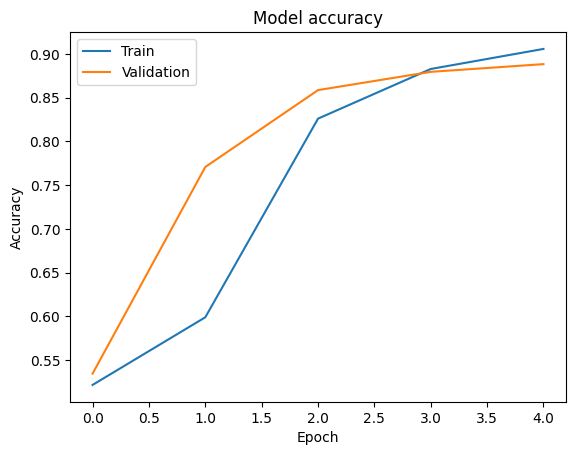

In [35]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

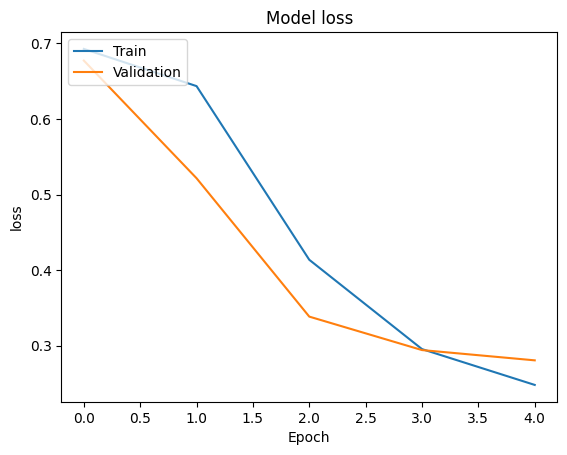

In [34]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()